# 1. Import Packages

In [112]:
import os
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
import cartopy.crs
import cartopy.io.img_tiles
import cartopy.feature

# need if working on VPN
#os.environ['HTTPS_PROXY'] = 'http://proxy01.pnl.gov:3128'
#os.environ['https_proxy'] = 'http://proxy01.pnl.gov:3128'

# 2. Load Shapefiles

In [113]:
domain = gpd.read_file('domain_1.shp') # read shapfile for watershed boundary (/qfs/projects/ICoM/flood/coupling/playground/domain/1/domain_1.shp)
water = gpd.read_file('water_bodies_d1.shp') # read shapfile for waterbody boudndary (/qfs/projects/ICoM/flood/coupling/playground/domain/1/water_bodies_d1.shp)

# 3. Set Dataset to Plot and Title

In [347]:
# uncomment a path to plot
path_stats = 'STATS-70Events.nc'
#path_stats = 'STATS-noPluvial.nc'
#path_stats = 'STATS-Season-Spring.nc'
#path_stats = 'STATS-Season-Summer.nc'
#path_stats = 'STATS-Season-Fall.nc'
#path_stats = 'STATS-Season-Winter.nc'

# uncomment a variable name to plot
#var = 'MAXDEPTH' # maximum peak flood depth
#var = 'PROB' # probability
#var = 'RATING' # rating
#var = 'MAXDEPTH_DRIVER' # driver causing maximum peak flood depth
#var = 'MAXDEPTH_SEASON' # season causing maximum peak flood depth
var = 'MAXPROB_DRIVER' # driver causing highest flood probability
#var = 'MAXPROB_SEASON' # season causing highest flood probability

path_output = 'FIGURE'
os.makedirs(os.path.join(path_output, os.path.splitext(os.path.basename(path_stats))[0]), exist_ok = True) # make a folder to output figures

# 4. Set Plotting Properties 

In [348]:
# basemap options
basemap_shaded = cartopy.io.img_tiles.GoogleTiles(url = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/tile/{z}/{y}/{x}.jpg')
basemap_satellite = cartopy.io.img_tiles.GoogleTiles(style = 'satellite')
basemap_street = cartopy.io.img_tiles.GoogleTiles(style = 'street')
basemap_OSM = cartopy.io.img_tiles.OSM()

# shapefile plotting properties
domain_feature = cartopy.feature.ShapelyFeature(domain['geometry'], crs = cartopy.crs.PlateCarree())
water_feature = cartopy.feature.ShapelyFeature(water['geometry'], crs = cartopy.crs.PlateCarree())

# other plotting properties
# ratings
rating_label = [
    'Rarely/\nMinor', # assigned to data value, 1
    'Rarely/\nModerate', # assigned to data value, 2
    'Rarely/\nSevere', # assigned to data value, 3
    'Occasionally/\nMinor', # assigned to data value, 4
    'Occasionally/\nModerate', # assigned to data value, 5
    'Occasionally/\nSevere', # assigned to data value, 6
    'Frequently/\nMinor', # assigned to data value, 7
    'Frequently/\nModerate', # assigned to data value, 8
    'Frequently/\nSevere', # assigned to data value, 9
    ]
# drivers
drv_label = [
    'fluvial-surge', # assigned to data value, 1
    'fluvial',
    'pluvial', # assigned to data value, 3
    'fluvial-pluvial', # assigned to data value, 6
    'surge', # assigned to data value, 7
    'fluvial-surge-pluvial', # assigned to data value, 8
    ]
# seasons
ssn_label = [
    'Spring', # assigned to data value, 1
    'Summer', # assigned to data value, 2
    'Fall', # assigned to data value, 3
    'Winter', # assigned to data value, 4
    ]

# label, tick location, and tick label
# maximum peak flood depth
cbar_kwarg_maxdepth = { 
#    'label': 'Flood Depth [m]', # colorbar label
    'label': None,
    }
# probability
cbar_kwarg_prob = { 
#    'label': 'Flood Occurence [%]', # colorbar label
    'label': None,
    }
# rating (probability/severity)
cbar_kwarg_rating = { 
#    'label': 'Rating (Probability/Severity)', # colorbar label
    'label': None,
    'ticks': list(range(1, 1 + len(rating_label))), # tick location: 1, 2, 3, 4, 5, 6, 7, 8, 9
    'format': mticker.FixedFormatter(rating_label), # tick label
    }
# driver causing maximum peak flood depth
cbar_kwarg_maxdepthdrv = { 
#    'label': 'Most Severe Flood Driver', # colorbar label
    'label': None,
    'ticks': list(range(1, 1 + len(drv_label))), # tick location: 1, 2, 3, 4, 5, 6, 7, 8, 9
    'format': mticker.FixedFormatter(drv_label), # tick label
    'extend': 'neither',
    }
# season causing maximum peak flood depth
cbar_kwarg_maxdepthssn = { 
#    'label': 'Most Severe Flood Season', # colorbar label
    'label': None,
    'ticks': list(range(1, 1 + len(ssn_label))), # tick location: 1, 2, 3, 4
    'format': mticker.FixedFormatter(ssn_label), # tick label
    }
# driver causing highest flood probability
cbar_kwarg_maxprobdrv = {
#    'label': 'Most Frequent Flood Driver', # colorbar label
    'label': None,
    'ticks': list(range(1, 1 + len(drv_label))), # tick location: 1, 2, 3, 4, 5, 6, 7, 8, 9
    'format': mticker.FixedFormatter(drv_label), # tick label
    'extend': 'neither',
    }
# season causing highest flood probability
cbar_kwarg_maxprobssn = {
#    'label': 'Most Frequent Flood Season', # colorbar label
    'label': None,
    'ticks': list(range(1, 1 + len(ssn_label))), # tick location: 1, 2, 3, 4
    'format': mticker.FixedFormatter(ssn_label), # tick label
    }

# colormaps for rating, driver, and season, respectively
#rating_cmap = mcolors.ListedColormap(plt.cm.tab20c( (2, 1, 0, 15, 14, 13, 7, 6, 5) )) # https://matplotlib.org/stable/users/explain/colors/colormaps.html
rating_cmap = mcolors.LinearSegmentedColormap.from_list('rating', ['#7ef9ef', '#41b6c4', '#225ea8', '#b3cde3', '#8c96c6', '#88419d', '#fdcc8a', '#fc8d59', '#d7301f'], len(rating_label))
drv_cmap = mcolors.LinearSegmentedColormap.from_list('driver', [(0.00392156862745098, 0.45098039215686275, 0.6980392156862745), 
                                                                '#d95f0e', 
                                                                #'#8c510a', '#6a51a3', 
                                                                '#238b45', 
                                                                '#73a2c6', '#98c4aa', '#c994c7'], len(drv_label)) 
ssn_cmap = mcolors.LinearSegmentedColormap.from_list('season', ['tab:green', 'tab:red', 'tab:purple', 'tab:blue'], len(ssn_label))

# 5. Choose a Dataset to Plot

In [349]:
# read netcdf file with xarray package
da_plot = xr.open_dataset(path_stats)[var]

#title = os.path.basename(f'{path_stats}: {var}')
if var == 'MAXDEPTH': # maximum peak flood depth
#    title = 'Most Severe Flood Depth'
    title = None
    vmin, vmax = 0, 1 # min, max for countour
    cmap = 'plasma_r' # colorpmap for coutour
    cbar_kwarg = cbar_kwarg_maxdepth
elif var == 'PROB': # probability
#    title = 'Flood Occurence'
    title = None
    vmin, vmax = 0, 60 # min, max for countour
    cmap = 'plasma_r' # colorpmap for coutour
    cbar_kwarg = cbar_kwarg_prob
elif var == 'RATING': # rating
#    title = 'Flood Rating (Occurence/Severity)'
    title = None
    vmin, vmax = 0.5, 0.5 + len(rating_label) # min, max for countour
    cmap = rating_cmap # colorpmap for coutour
    cbar_kwarg = cbar_kwarg_rating
elif var.endswith('_DRIVER'): # drivers
    # reassign values to lump some drivers together
    da_plot = da_plot.where(da_plot != 9, 2)  # Replace 10 with 1
    da_plot = da_plot.where(da_plot != 10, 1)  # Replace 10 with 1
    da_plot = da_plot.where(da_plot != 11, 6)  # 
    da_plot = da_plot.where(da_plot != 12, 3)  # 
    da_plot = da_plot.where(da_plot != 12, 3)  #
    da_plot = da_plot.where(da_plot != 3, 9)  # 
    da_plot = da_plot.where(da_plot != 4, 3)  # 
    da_plot = da_plot.where(da_plot != 5, 4)  # 
    da_plot = da_plot.where(da_plot != 9, 5)  # 
    da_plot = da_plot.where(da_plot != 3, 2)  # 
    da_plot = da_plot.where(da_plot != 4, 2)  #
    da_plot = da_plot.where(da_plot != 5, 3)  #
    da_plot = da_plot.where(da_plot != 6, 4)  #
    da_plot = da_plot.where(da_plot != 7, 5)  #
    da_plot = da_plot.where(da_plot != 8, 6)  #
    
    vmin, vmax = 0.5, 0.5 + len(drv_label) # min, max for countour
    cmap = drv_cmap # colorpmap for coutour
    if var.startswith('MAXDEPTH_'):
#        title = 'Most Severe Flood Driver'
        title = None
        cbar_kwarg = cbar_kwarg_maxdepthdrv # driver causing maximum peak flood depth
    elif var.startswith('MAXPROB_'):
#        title = 'Most Frequenct Flood Driver'
        title = None
        cbar_kwarg = cbar_kwarg_maxprobdrv # driver causing highest flood probability
elif var.endswith('_SEASON'): # seasons
    vmin, vmax = 0.5, 0.5 + len(ssn_label) # min, max for countour
    cmap = ssn_cmap # colorpmap for coutour
    if var.startswith('MAXDEPTH_'):
#        title = 'Most Severe Flood Season'
        title = None
        cbar_kwarg = cbar_kwarg_maxdepthssn # season causing maximum peak flood depth
    elif var.startswith('MAXPROB_'):
#        title = 'Most Frequent Flood Season'
        title = None
        cbar_kwarg = cbar_kwarg_maxprobssn # season causing highest flood probability

# 6. Plots

In [350]:
# define a plotting function
from matplotlib.colors import LogNorm, PowerNorm
import cartopy.crs as ccrs
def plot(da_plot, figsize, title, title_fontdict, basemap, basemap_res, extent, vmin, vmax, cmap, cbar_kwarg, alpha, norm=None, savefig = None):
    fig, ax = plt.subplots(figsize = figsize, subplot_kw = {'projection': basemap.crs})
    ax.add_image(basemap, basemap_res, alpha=0.65) # add basemap
    ax.add_feature(domain_feature, facecolor = 'none', ec = 'k', linewidth = 1) # add watershed boundary
    ax.add_feature(water_feature, facecolor = 'none', ec = 'gray', linewidth = 0.3) # add waterbody boundary
    ax.set_extent(extent, crs = cartopy.crs.PlateCarree()) # set plotting domain
    fgl = ax.gridlines(crs = cartopy.crs.PlateCarree(), linestyle = '--', alpha = 0.25, draw_labels = True) # add lon/lat gridlines
    fgl.top_labels, fgl.right_labels = False, False # remove gridline labels top and right
    fgl.xlabel_style, fgl.ylabel_style = {'color': 'gray', 'size': 8}, {'color': 'gray', 'size': 8} # set gridline styles
    da_plot.plot(ax = ax, transform = cartopy.crs.PlateCarree(), vmin = vmin, vmax = vmax, 
                 cmap = cmap, norm=norm, cbar_kwargs = cbar_kwarg, alpha = alpha) # plot data
    ax.set_title(title, title_fontdict) # set figure title
    fig.tight_layout()
    if savefig is not None: plt.savefig(savefig, bbox_inches = 'tight', dpi = 300)
    plt.show()
    return

## 6-1. Watershed Scale Plot

In [303]:
import numpy as np
flat_data2 = da_plot.values.flatten()

# Remove NaN values (if any)
flat_data = flat_data2[~np.isnan(flat_data2)]
print(flat_data)

# Get unique values and their counts (for drivers)
unique_values, counts = np.unique(flat_data, return_counts=True)
percentages = counts/993094*100

# Create a dictionary or a DataFrame with results
result = dict(zip(unique_values, percentages))
print("Percentage of each unique value:")
for value, percentage in result.items():
    driver_name = drv_label[int(value) - 1]
    print(f"Value: {value}, Driver: {driver_name}, Percentage: {percentage:.2f}%")



count = np.sum(flat_data > 0.15)
print(count)
print(flat_data.size)
percentages = count/993094*100
print("percent of cells inundated:")
print(percentages)

[6. 6. 6. ... 1. 1. 1.]
Percentage of each unique value:
Value: 1.0, Driver: fluvial-surge, Percentage: 1.84%
Value: 2.0, Driver: fluvial, Percentage: 0.04%
Value: 3.0, Driver: pluvial, Percentage: 7.77%
Value: 4.0, Driver: fluvial-pluvial, Percentage: 0.01%
Value: 6.0, Driver: fluvial-surge-pluvial, Percentage: 6.91%
164448
164448
percent of cells inundated:
16.55915754198495


In [291]:
print(os.path.basename(path_stats))

STATS-70Events.nc


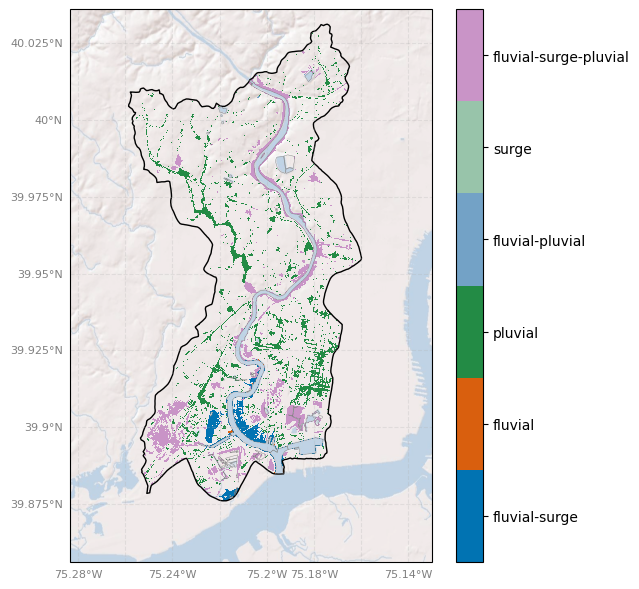

In [304]:
from matplotlib.colors import PowerNorm

figsize = (6, 6) #None # e.g., (6, 6)
basemap = basemap_shaded # select basemap
extent = [da_plot['lon'].min() - 0.025, da_plot['lon'].max() + 0.03, da_plot['lat'].min() - 0.02, da_plot['lat'].max()+0.005] # plotting domain
basemap_res = 13 # select basemap zoom level
alpha = 1.0 # set opacity
savefig = os.path.join(path_output, os.path.splitext(os.path.basename(path_stats))[0], f'{var}-Watershed.png') # path to save figure

cbar_kwarg['orientation'] = 'vertical'
plot(
    da_plot = da_plot,
    figsize = figsize,
    title = title,
    title_fontdict = {'fontsize': 12},
    basemap = basemap,
    basemap_res = basemap_res,
    extent = extent,
    vmin = vmin,
    vmax = vmax,
    cmap = cmap,
    cbar_kwarg = cbar_kwarg,
    alpha = alpha,
    savefig = savefig,
    )

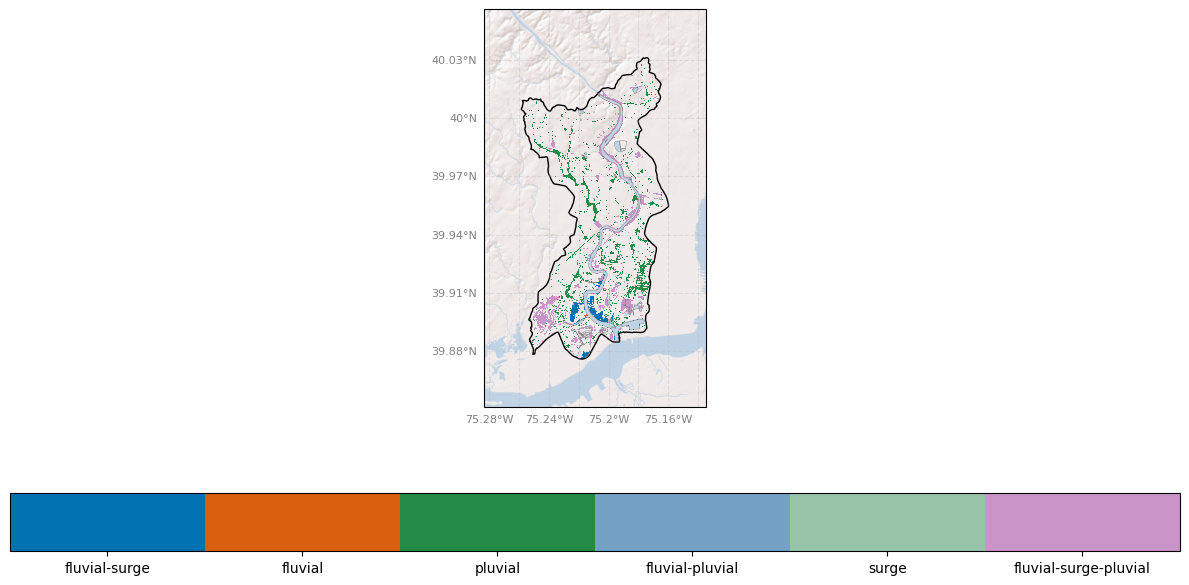

In [293]:
# Plot #1
figsize = (12, 6) #None # e.g., (6, 6)
basemap = basemap_shaded # select basemap
extent = [da_plot['lon'].min() - 0.025, da_plot['lon'].max() + 0.025, da_plot['lat'].min() - 0.025, da_plot['lat'].max() + 0.025] # plotting domain
basemap_res = 13 # select basemap zoom level
alpha = 1.0 # set opacity
savefig = os.path.join(path_output, os.path.splitext(os.path.basename(path_stats))[0], f'{var}-legend.png') # path to save figure

cbar_kwarg['orientation'] = 'horizontal'
plot(
    da_plot = da_plot,
    figsize = figsize,
    title = title,
    title_fontdict = {'fontsize': 12},
    basemap = basemap,
    basemap_res = basemap_res,
    extent = extent,
    vmin = vmin,
    vmax = vmax,
    cmap = cmap,
    cbar_kwarg = cbar_kwarg,
    alpha = alpha,
    savefig = savefig,
    )

## 6-2. Zoomed Plot: Coastal Area

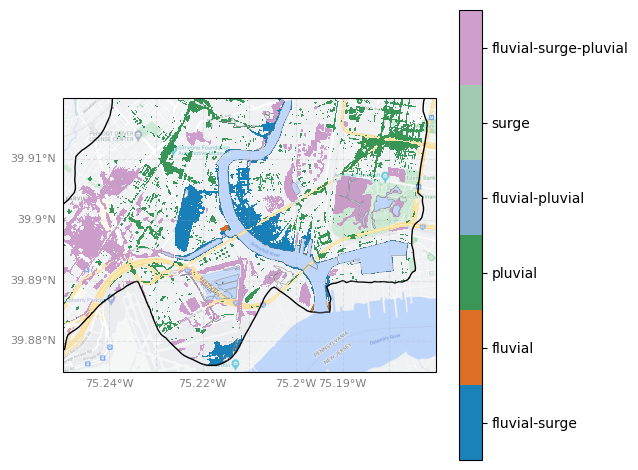

In [294]:
# Plot #2
figsize = None # e.g., (6, 6)
basemap = basemap_street # select basemap
extent = [-75.25, -75.17, 39.875, 39.92] # plotting domain
basemap_res = 14 # select basemap zoom level
alpha = 0.9 # set opacity
savefig = os.path.join(path_output, os.path.splitext(os.path.basename(path_stats))[0], f'{var}-Coastal.png') # path to save figure

cbar_kwarg['orientation'] = 'vertical'
plot(
    da_plot = da_plot,
    figsize = figsize,
    title = title,
    title_fontdict = {'fontsize': 18},
    basemap = basemap,
    basemap_res = basemap_res,
    extent = extent,
    vmin = vmin,
    vmax = vmax,
    cmap = cmap,
    cbar_kwarg = cbar_kwarg,
    alpha = alpha,
    savefig = savefig,
    )

## 6-3. Zoomed Plot: Fairmount Dam Downstream

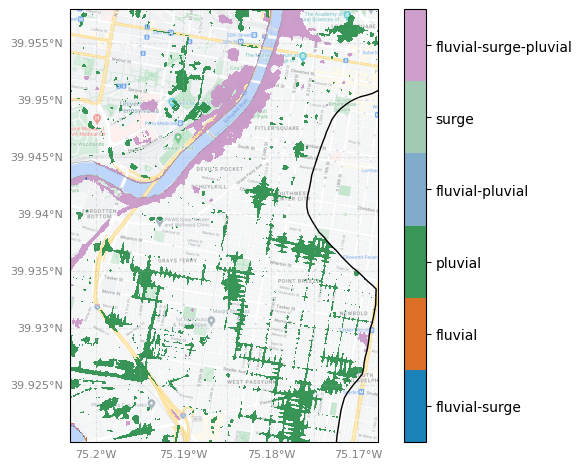

In [323]:
# Plot #3
figsize = None # e.g., (6, 6)
basemap = basemap_street # select basemap
extent = [-75.203, -75.1677, 39.92, 39.958] # plotting domain
basemap_res = 15 # select basemap zoom level
alpha = 0.9 # set opacity
savefig = os.path.join(path_output, os.path.splitext(os.path.basename(path_stats))[0], f'{var}-DamDownstream.png') # path to save figure

cbar_kwarg['orientation'] = 'vertical'
plot(
    da_plot = da_plot,
    figsize = figsize,
    title = title,
    title_fontdict = {'fontsize': 18},
    basemap = basemap,
    basemap_res = basemap_res,
    extent = extent,
    vmin = vmin,
    vmax = vmax,
    cmap = cmap,
    cbar_kwarg = cbar_kwarg,
    alpha = alpha,
    savefig = savefig,
    )

## 6-4. Zoomed Plot: Fairmount Dam Upstream

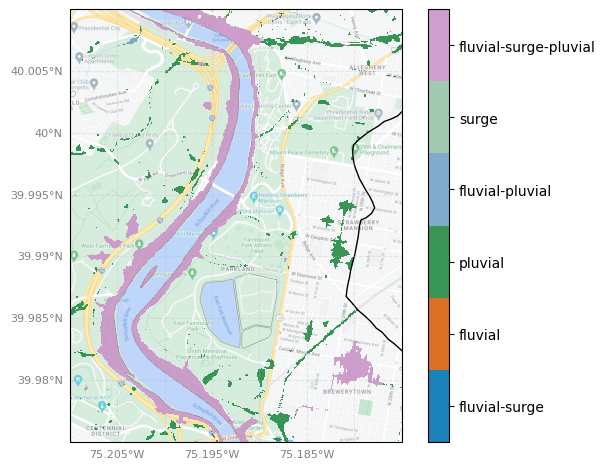

In [324]:
# Plot #5
figsize = None # e.g., (6, 6)
basemap = basemap_street # select basemap
extent = [-75.21, -75.175, 39.975, 40.01] # plotting domain
basemap_res = 15 # select basemap zoom level
alpha = 0.9 # set opacity
savefig = os.path.join(path_output, os.path.splitext(os.path.basename(path_stats))[0], f'{var}-DamUpstream.png') # path to save figure

cbar_kwarg['orientation'] = 'vertical'
plot(
    da_plot = da_plot,
    figsize = figsize,
    title = title,
    title_fontdict = {'fontsize': 12},
    basemap = basemap,
    basemap_res = basemap_res,
    extent = extent,
    vmin = vmin,
    vmax = vmax,
    cmap = cmap,
    cbar_kwarg = cbar_kwarg,
    alpha = alpha,
    savefig = savefig,
    )

## 6-5. Zoomed Plot: Schuylkill River West

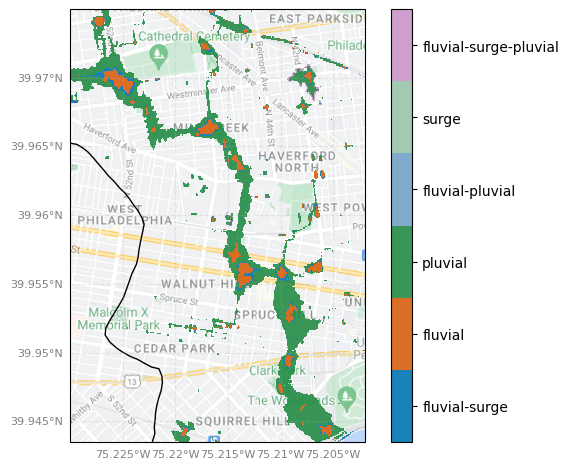

In [351]:
# Plot #5
figsize = None # e.g., (6, 6)
basemap = basemap_street # select basemap
extent = [-75.23, -75.202, 39.9435, 39.975] # plotting domain
basemap_res = 14 # select basemap zoom level
alpha = 0.9 # set opacity
savefig = os.path.join(path_output, os.path.splitext(os.path.basename(path_stats))[0], f'{var}-RiverWest.png') # path to save figure

cbar_kwarg['orientation'] = 'vertical'
plot(
    da_plot = da_plot,
    figsize = figsize,
    title = title,
    title_fontdict = {'fontsize': 12},
    basemap = basemap,
    basemap_res = basemap_res,
    extent = extent,
    vmin = vmin,
    vmax = vmax,
    cmap = cmap,
    cbar_kwarg = cbar_kwarg,
    alpha = alpha,
    savefig = savefig,
    )